In [2]:
import pandas as pd

LOADING IN THE CUSTOMERS DATA

In [4]:
df_customers = pd.read_csv("dataset/raw/customers.csv")

/tmp/ipykernel_13792/1941861754.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customers = pd.read_csv("dataset/raw/customers.csv")


In [5]:
df_customers.head()

,Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
0,1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,NaN
1,2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
2,3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,NaN
3,4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader
4,5,Ashley Sanders,ashley.sanders@fake_hotmail.com,7814535781,New York,United States,F,1998-02-10,Exercise physiologist


In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Customer ID    1643306 non-null  int64 
 1   Name           1643306 non-null  object
 2   Email          1643306 non-null  object
 3   Telephone      1643306 non-null  object
 4   City           1643306 non-null  object
 5   Country        1643306 non-null  object
 6   Gender         1643306 non-null  object
 7   Date Of Birth  1643306 non-null  object
 8   Job Title      1059121 non-null  object
dtypes: int64(1), object(8)
memory usage: 112.8+ MB


In [7]:
# Rename the column "Date of Birth" to "DOB"
df_customers = df_customers.rename(columns={df_customers.columns[7]: 'DOB'})

# Convert the DOB datatype to Datetime, Customer ID to string
df_customers['DOB'] = pd.to_datetime(df_customers['DOB'])
df_customers['Customer ID'] = df_customers['Customer ID'].astype(str)

# Drop unwanted columns from the customer table
df_customers = df_customers.drop(columns=['Email', 'Telephone', 'Job Title'])


In [8]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Customer ID  1643306 non-null  object        
 1   Name         1643306 non-null  object        
 2   City         1643306 non-null  object        
 3   Country      1643306 non-null  object        
 4   Gender       1643306 non-null  object        
 5   DOB          1643306 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 75.2+ MB


In [9]:
df_customers.head()

,Customer ID,Name,City,Country,Gender,DOB
0,1,Tyler Garcia,New York,United States,M,2003-07-15
1,2,Joshua Miller,New York,United States,M,2000-06-16
2,3,Alison Marshall DDS,New York,United States,F,2003-07-22
3,4,Jeffery Acosta,New York,United States,M,1996-11-12
4,5,Ashley Sanders,New York,United States,F,1998-02-10


In [10]:
df_customers['Gender'].unique()

array(['M', 'F', 'D'], dtype=object)

In [11]:
df_customers['Country'].unique()

array(['United States', '中国', 'Deutschland', 'United Kingdom', 'France',
       'España', 'Portugal'], dtype=object)

In [ ]:
# Renaming to China, Germany and Spain
df_customers['Country'] = df_customers['Country'].replace({'中国':'China', 'Deutschland':'Germany', 'España':'Spain'})

/tmp/ipykernel_13792/2347565847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers['Country'].replace({'中国':'China', 'Deutschland':'Germany', 'España':'Spain'}, inplace=True)


In [13]:
df_customers['Country'].unique()

array(['United States', 'China', 'Germany', 'United Kingdom', 'France',
       'Spain', 'Portugal'], dtype=object)

In [14]:
df_customers['City'].unique()

array(['New York', 'Newark', 'Jersey City', 'Yonkers', 'White Plains',
       'New Rochelle', 'Stamford', 'Bridgeport', 'Elizabeth', 'Paterson',
       'Hempstead', 'Los Angeles', 'Long Beach', 'Anaheim', 'Santa Ana',
       'Irvine', 'Glendale', 'Burbank', 'Pasadena', 'Torrance',
       'Riverside', 'San Bernardino', 'Chicago', 'Aurora', 'Naperville',
       'Evanston', 'Oak Park', 'Schaumburg', 'Joliet', 'Elgin', 'Cicero',
       'Skokie', 'Arlington Heights', 'Houston', 'The Woodlands',
       'Sugar Land', 'Pearland', 'Katy', 'Baytown', 'Pasadena (TX)',
       'Missouri City', 'League City', 'Conroe', 'Galveston', 'Phoenix',
       'Mesa', 'Scottsdale', 'Tempe', 'Glendale (AZ)', 'Chandler',
       'Gilbert', 'Peoria (AZ)', 'Surprise', 'Avondale', 'Goodyear',
       'San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Daly City',
       'South San Francisco', 'Redwood City', 'Palo Alto',
       'Mountain View', 'Fremont', 'Concord', 'Miami', 'Miami Beach',
       'Hialeah', 'Fort La

In [ ]:
# Renaming all China cities writen in chinese
df_customers['City'] = df_customers['City'] \
    .replace({'上海':'Shangai', '浦东':'Pudong', '虹口':'Hongkou',
              '宝山':'Baoshan', '闵行':'Minhang', '嘉定':'Jiading', '苏州（江苏省）':'Suzhou', '昆山':'Kunshan', '南通':'Nantong',
              '嘉兴':'Jiaxing', '杭州':'Hangzhou', '北京':'Beijing', '海淀':'Haidian', '朝阳':'Zhāo yáng', '丰台':'Fengtai', '通州':'Tongzhou',
              '石家庄': 'Shijiazhuang', '天津': 'Tianjin', '廊坊': 'Langfang', '保定': 'Baoding', '承德': 'Chengde', '张家口': 'Zhangjiakou',
    '广州': 'Guangzhou', '天河': 'Tianhe', '白云': 'Baiyun', '越秀': 'Yuexiu', '佛山': 'Foshan', '东莞': 'Dongguan', '深圳': 'Shenzhen',
    '中山': 'Zhongshan', '珠海': 'Zhuhai', '惠州': 'Huizhou', '清远': 'Qingyuan', '福田': 'Futian', '南山': 'Nanshan', '宝安': 'Baoan',
    '龙岗': 'Longgang', '香港': 'Hong Kong', '澳门': 'Macau', '重庆': 'Chongqing', '渝中': 'Yuzhong', '江北': 'Jiangbei',
    '沙坪坝': 'Shapingba', '渝北': 'Yubei', '涪陵': 'Fuling', '万州': 'Wanzhou', '黔江': 'Qianjiang', '大足': 'Dazu',
    '璧山': 'Bishan', '合川': 'Hechuan', '成都': 'Chengdu', '锦江': 'Jinjiang', '青羊': 'Qingyang', '武侯': 'Wuhou',
    '龙泉驿': 'Longquanyi', '双流': 'Shuangliu', '德阳': 'Deyang', '绵阳': 'Mianyang', '乐山': 'Leshan', '眉山': 'Meishan',
    '资阳': 'Ziyang', '和平': 'Heping', '河东': 'Hedong', '河西': 'Hexi', '南开': 'Nankai', '滨海': 'Binhai', '唐山': 'Tangshan',
    '沧州': 'Cangzhou', '秦皇岛': 'Qinhuangdao', '西安': 'Xi’an', '碑林': 'Beilin', '莲湖': 'Lianhu', '新城': 'Xincheng',
    '雁塔': 'Yanta', '长安': 'Chang’an', '咸阳': 'Xianyang', '渭南': 'Weinan', '宝鸡': 'Baoji', '铜川': 'Tongchuan',
    '汉中': 'Hanzhong', '武汉': 'Wuhan', '江岸': 'Jiangan', '江汉': 'Jianghan', '硚口': 'Qiaokou', '汉阳': 'Hanyang',
    '武昌': 'Wuchang', '黄陂': 'Huangpi', '新洲': 'Xinzhou', '鄂州': 'Ezhou', '黄冈': 'Huanggang', '咸宁': 'Xianning',
    '苏州': 'Suzhou', '姑苏': 'Gusu', '虎丘': 'Huqiu', '吴中': 'Wuzhong', '相城': 'Xiangcheng', '常熟': 'Changshu',
    '张家港': 'Zhangjiagang', '太仓': 'Taicang', '无锡': 'Wuxi'})

In [16]:
df_customers['City'].unique()

array(['New York', 'Newark', 'Jersey City', 'Yonkers', 'White Plains',
       'New Rochelle', 'Stamford', 'Bridgeport', 'Elizabeth', 'Paterson',
       'Hempstead', 'Los Angeles', 'Long Beach', 'Anaheim', 'Santa Ana',
       'Irvine', 'Glendale', 'Burbank', 'Pasadena', 'Torrance',
       'Riverside', 'San Bernardino', 'Chicago', 'Aurora', 'Naperville',
       'Evanston', 'Oak Park', 'Schaumburg', 'Joliet', 'Elgin', 'Cicero',
       'Skokie', 'Arlington Heights', 'Houston', 'The Woodlands',
       'Sugar Land', 'Pearland', 'Katy', 'Baytown', 'Pasadena (TX)',
       'Missouri City', 'League City', 'Conroe', 'Galveston', 'Phoenix',
       'Mesa', 'Scottsdale', 'Tempe', 'Glendale (AZ)', 'Chandler',
       'Gilbert', 'Peoria (AZ)', 'Surprise', 'Avondale', 'Goodyear',
       'San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Daly City',
       'South San Francisco', 'Redwood City', 'Palo Alto',
       'Mountain View', 'Fremont', 'Concord', 'Miami', 'Miami Beach',
       'Hialeah', 'Fort La

LOADING IN THE EMPLOYEE DATA

In [17]:
df_employee = pd.read_csv("dataset/raw/employees.csv")

In [18]:
df_employee.head()

,Employee ID,Store ID,Name,Position
0,1,1,Stephen Johnson,Store Manager
1,2,1,Rebecca Myers,Assistant Manager
2,3,1,Katherine Buchanan,Cashier
3,4,1,Jessica Hicks,Stock Clerk
4,5,1,Ryan Gross,Sales Associate


In [19]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee ID  404 non-null    int64 
 1   Store ID     404 non-null    int64 
 2   Name         404 non-null    object
 3   Position     404 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.8+ KB


In [20]:
# Changed employee and store IDs datatype to string
df_employee['Employee ID'] = df_employee['Employee ID'].astype(str)
df_employee['Store ID'] = df_employee['Store ID'].astype(str)

In [21]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee ID  404 non-null    object
 1   Store ID     404 non-null    object
 2   Name         404 non-null    object
 3   Position     404 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


LOADING IN THE PRODUCTS DATA

In [22]:
df_product = pd.read_csv("dataset/raw/products.csv")

In [23]:
df_product.head()

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,10.73
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
2,3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
3,4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,NaN,S|M|L|XL,27.62
4,5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,NaN,S|M|L,11.69


In [24]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       17940 non-null  int64  
 1   Category         17940 non-null  object 
 2   Sub Category     17940 non-null  object 
 3   Description PT   17940 non-null  object 
 4   Description DE   17940 non-null  object 
 5   Description FR   17940 non-null  object 
 6   Description ES   17940 non-null  object 
 7   Description EN   17940 non-null  object 
 8   Description ZH   17940 non-null  object 
 9   Color            5495 non-null   object 
 10  Sizes            15870 non-null  object 
 11  Production Cost  17940 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB


In [25]:
# Remove unwanted columns
df_product = df_product.drop\
    (columns=['Sub Category', 'Description PT', 'Description DE', 'Description FR', 'Description ES', 'Description ZH', 'Color'])

# Change product id datatype to string
df_product['Product ID'] = df_product['Product ID'].astype(str)

# drop empty rows.
df_product.dropna(subset=['Sizes'], inplace=True)

In [26]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15870 entries, 0 to 17938
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       15870 non-null  object 
 1   Category         15870 non-null  object 
 2   Description EN   15870 non-null  object 
 3   Sizes            15870 non-null  object 
 4   Production Cost  15870 non-null  float64
dtypes: float64(1), object(4)
memory usage: 743.9+ KB


In [27]:
df_product['Category'].unique()

array(['Feminine', 'Masculine', 'Children'], dtype=object)

LOADING IN THE STORES DATA

In [28]:
df_store = pd.read_csv("dataset/raw/stores.csv")

In [29]:
df_store.head()

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,10,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,85001,33.4484,-112.0740


In [30]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             35 non-null     int64  
 1   Country              35 non-null     object 
 2   City                 35 non-null     object 
 3   Store Name           35 non-null     object 
 4   Number of Employees  35 non-null     int64  
 5   ZIP Code             35 non-null     object 
 6   Latitude             35 non-null     float64
 7   Longitude            35 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ KB


In [31]:
# change store ID datatype to string
df_store['Store ID'] = df_store['Store ID'].astype(str)

# Drop unwanted columns
df_store = df_store.drop(columns=['Store Name', 'ZIP Code', 'Latitude', 'Longitude'])

In [32]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Store ID             35 non-null     object
 1   Country              35 non-null     object
 2   City                 35 non-null     object
 3   Number of Employees  35 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [33]:
df_store['Country'].unique()

array(['United States', '中国', 'Deutschland', 'United Kingdom', 'France',
       'España', 'Portugal'], dtype=object)

In [ ]:
# Renaming to China, Germany and Spain
df_store['Country'] = df_store['Country'].replace({'中国':'China', 'Deutschland':'Germany', 'España':'Spain'})

In [35]:
df_store['Country'].unique()

array(['United States', 'China', 'Germany', 'United Kingdom', 'France',
       'Spain', 'Portugal'], dtype=object)

In [36]:
df_store['City'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', '上海',
       '北京', '广州', '深圳', '重庆', 'Berlin', 'Hamburg', 'München', 'Köln',
       'Frankfurt am Main', 'London', 'Birmingham', 'Glasgow',
       'Liverpool', 'Bristol', 'Paris', 'Marseille', 'Lyon', 'Toulouse',
       'Nice', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza',
       'Lisboa', 'Porto', 'Braga', 'Guimarães', 'Coimbra'], dtype=object)

In [ ]:
# Renaming to Chinese to English word
df_store['City'] = df_store['City'].replace({'北京':'Beijing', '上海':'Shangai', '广州':'Guangzhou', '深圳':'Shenzhen', '重庆':'Chongqing'})

/tmp/ipykernel_13792/1176884474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['City'].replace({'北京':'Beijing', '上海':'Shangai', '广州':'Guangzhou', '深圳':'Shenzhen', '重庆':'Chongqing'}, inplace=True)


In [38]:
df_store['City'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Shangai', 'Beijing', 'Guangzhou', 'Shenzhen', 'Chongqing',
       'Berlin', 'Hamburg', 'München', 'Köln', 'Frankfurt am Main',
       'London', 'Birmingham', 'Glasgow', 'Liverpool', 'Bristol', 'Paris',
       'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Madrid', 'Barcelona',
       'Valencia', 'Sevilla', 'Zaragoza', 'Lisboa', 'Porto', 'Braga',
       'Guimarães', 'Coimbra'], dtype=object)

LOADING IN THE TRANSACTIONS DATA

In [39]:
df_transaction = pd.read_csv("dataset/raw/transactions.csv")

In [40]:
df_transaction.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Invoice ID        6416827 non-null  object 
 1   Line              6416827 non-null  int64  
 2   Customer ID       6416827 non-null  int64  
 3   Product ID        6416827 non-null  int64  
 4   Size              6003725 non-null  object 
 5   Color             2066044 non-null  object 
 6   Unit Price        6416827 non-null  float64
 7   Quantity          6416827 non-null  int64  
 8   Date              6416827 non-null  object 
 9   Discount          6416827 non-null  float64
 10  Line Total        6416827 non-null  float64
 11  Store ID          6416827 non-null  int64  
 12  Employee ID       6416827 non-null  int64  
 13  Currency          6416827 non-null  object 
 14  Currency Symbol   6416827 non-null  object 
 15  SKU               6416827 non-null  object 
 16  

In [41]:
# Change ID's datatype to string
df_transaction['Customer ID'] = df_transaction['Customer ID'].astype(str)
df_transaction['Store ID'] = df_transaction['Store ID'].astype(str)
df_transaction['Product ID'] = df_transaction['Product ID'].astype(str)
df_transaction['Employee ID'] = df_transaction['Employee ID'].astype(str)

# Convert the DOB datatype to Datetime, Customer ID to string
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

# Rename Line total as Cost of Goods Sold
df_transaction = df_transaction.rename(columns={df_transaction.columns[10]: 'COGS'})

# Drop unwanted columns
df_transaction = df_transaction.drop(columns=['SKU', 'Color', 'Line', 'Currency Symbol', 'Invoice Total'])

In [43]:
df_transaction['Size'].unique()

array(['M', 'G', 'L', nan, 'XXL', 'XL', '38', 'P', 'S', '36', '44', '40',
       '42', '46', '48', 'GG'], dtype=object)

In [ ]:
df_transaction['Size']\
    .replace(
        {'G':'L', '38':'S', 'P':'S', '36':'S', '44':'XL', '40':'M',
       '42':'L', '46':'XXL', '48':'XXXL', 'GG':'XL'
        }, inplace=True)
df_transaction['Size'] = df_transaction['Size'].fillna('Not Applicable')

In [53]:
df_transaction['Size'].unique()

array(['M', 'L', 'Not Applicable', 'XXL', 'XL', 'S', 'XXXL'], dtype=object)

In [54]:
df_transaction.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Invoice ID        6416827 non-null  object        
 1   Customer ID       6416827 non-null  object        
 2   Product ID        6416827 non-null  object        
 3   Size              6416827 non-null  object        
 4   Unit Price        6416827 non-null  float64       
 5   Quantity          6416827 non-null  int64         
 6   Date              6416827 non-null  datetime64[ns]
 7   Discount          6416827 non-null  float64       
 8   COGS              6416827 non-null  float64       
 9   Store ID          6416827 non-null  object        
 10  Employee ID       6416827 non-null  object        
 11  Currency          6416827 non-null  object        
 12  Transaction Type  6416827 non-null  object        
 13  Payment Method    6416827 non-null  object

In [55]:
df_transaction['Currency'].unique()

array(['USD', 'CNY', 'EUR', 'GBP'], dtype=object)

This shows that some COGS are in different currency, to convert everything to USD;

In [91]:
# Set exchange rate for yuan, pounds, and euro
exchange_rates = {
    "USD": 1,
    "CNY": 0.14,  
    "EUR": 1.08, 
    "GBP": 1.26}

In [69]:
# Convert COGS to USD using vectorized `map()`
df_transaction["COGS(usd)"] = df_transaction["COGS"] * df_transaction["Currency"].map(exchange_rates)

In [70]:
df_transaction.head()

,Invoice ID,Customer ID,Product ID,Size,Unit Price,Quantity,Date,Discount,COGS,Store ID,Employee ID,Currency,Transaction Type,Payment Method,COGS(usd)
0,INV-US-001-03558761,47162,485,M,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,Sale,Cash,80.5
1,INV-US-001-03558761,47162,2779,L,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,Sale,Cash,18.9
2,INV-US-001-03558761,47162,64,M,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,Sale,Cash,27.3
3,INV-US-001-03558762,10142,131,M,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,Sale,Cash,42.0
4,INV-US-001-03558762,10142,716,L,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,Sale,Cash,26.0


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

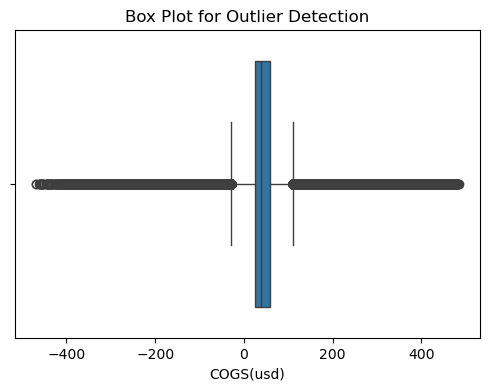

In [74]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_transaction["COGS(usd)"])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [89]:
subset_df = df_transaction[df_transaction['COGS(usd)'] < -300]
print(subset_df.head())

                Invoice ID Customer ID Product ID Size  Unit Price  Quantity  \
26251  RET-US-001-03575953       12176       4848    M       103.0         3   
29736  RET-US-001-03578780       69406       3267    M       119.0         3   
45708  RET-US-001-03589540       23524       5451    M       124.0         3   
48491  RET-US-001-03590879       37094       5425    M       103.5         3   
49011  RET-US-001-03589540       23524       5451    M       124.0         3   

            Date  Discount   COGS Store ID Employee ID Currency  \
26251 2023-03-04       0.0 -309.0        1          13      USD   
29736 2023-03-11       0.0 -357.0        1          13      USD   
45708 2023-04-03       0.0 -372.0        1          12      USD   
48491 2023-04-09       0.0 -310.5        1          13      USD   
49011 2023-04-11       0.0 -372.0        1          12      USD   

      Transaction Type Payment Method  COGS(usd)  
26251           Return           Cash     -309.0  
29736         

With the above output, we can see that the ones with negative values are return purchases

Then, Save the dataFrame as a .parquet file

In [92]:
df_customers.to_parquet("dataset/pq/customers.parquet")

In [93]:
df_employee.to_parquet("dataset/pq/employees.parquet")

In [94]:
df_store.to_parquet("dataset/pq/stores.parquet")

In [95]:
df_product.to_parquet("dataset/pq/products.parquet")

In [96]:
df_transaction.to_parquet("dataset/pq/transactions.parquet")